## V392 Per Brightness Temperature Work


In [1]:
#imports
import numpy as np
import pandas as pd
import astropy.units as u
import astropy.constants as const

import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
#frequency of 1.26 (also has some of 1.4)
f1_26 = ([58712.62,	1.26,	0.38,	0.09,	475],
         [58652.58,	1.26,	0.104,	0.0989,	415],
         [58627.98,	1.26,	0.0193,	0.086,	390],
         [58519.04,	1.26,	0.111,	0.109,	282],
         [58493.11,	1.26,	0.178,	0.151,	256],
         [58460.18,	1.26,	0.105,	0.111,	223],
         [58423.58,	1.26,	-0.108,	0.241,	186],
         [58379.44,	1.26,	1.033,	0.223,	142],
         [58368.43,	1.26,	0.971,	0.272,	131],
         [58347.5,	1.4,	0.22,	0.035,	110],
         [58278.58,	1.26,	3.704,	0.0571,	41],
         [58269.61,	1.26,	3.471,	0.0551,	32],
         [58260.96,	1.26,	1.576,	0.0616,	23],
         [58256.62,	1.26,	0.626,	0.0562,	19],
         [58250.64,	1.26,	0.114,	0.0474,	13],
         [58238.93,	1.26,	-0.0122,	0.0531,	1],
        )
#frequency of 1.74 (also has some of 1.78)
f1_74 = ([58765.29,	1.78,	0.0962,	0.066,	528],
         
         [58712.62,	1.78,	0.255,	0.067,	475],
         #[58652.58,	1.78,	0.0834,	0.0396,	415],
         [58627.98,	1.78,	0.177,	0.044,	390],
         [58519.04,	1.74,	0.41,	0.0637,	282],
         [58493.11,	1.74,	0.402,	0.0811,	256],
         [58460.18,	1.74,	0.349,	0.0714,	223],
         [58423.58,	1.74,	0.511,	0.107,	186],
         [58379.44,	1.74,	0.417,	0.125,	142],
         [58368.43,	1.74,	0.85,	0.116,	131],
         [58278.58,	1.74,	3.746,	0.0413,	41],
         [58269.61,	1.74,	3.887,	0.0374,	32],
         [58260.96,	1.74,	2.015,	0.041,	23],
         [58256.62,	1.74,	0.948,	0.0424,	19],
         [58250.64,	1.74,	0.15,	0.0419,	13],
         [58238.93,	1.74,	0.0298,	0.0385,	1],
        )
#frequency of 5 (also has some of 4.868)
f5 = ([58984.93,	5,	0.0606,	0.016,	747],
      [58924.11,	5,	0.117,	0.022,	687],
      #[58765.29,	5,	0.0426,	0.016,	528],
      [58712.62,	5,	0.075,	0.017,	475],
      [58652.58,	5,	0.165,	0.0134,	415],
      [58627.98,	5,	0.157,	0.0145,	390],
      [58519.04,	5,	0.492,	0.0127,	282],
      [58493.11,	5,	0.559,	0.0158,	256],
      [58460.18,	5,	0.766,	0.0137,	223],
      [58423.58,	5,	1.121,	0.0201,	186],
      [58379.44,	5,	1.637,	0.0158,	142],
      [58368.43,	5,	1.865,	0.017,	131],
      [58323.5,	4.868,	1.2,	0.02,	86],
      
      [58283.6,	4.868,	3.57,	0.025,	46],	
      
      [58278.58,	5,	4.419,	0.0123,	41],
      [58269.61,	5,	5.226,	0.0122,	32],
      [58260.96,	5,	4.523,	0.0134,	23],
      [58259.7,	4.868,	3.932,	0.0196,	22],
      [58256.62,	5,	3.227,	0.0131,	19],
      [58250.64,	5,	0.5,	0.0132,	13],
      [58246.67,	5,	0.232,	0.0125,	9],
      [58238.93,	5,	0.0152,	0.012,	1],
     )
#frequency of 7 (also has some of 8.416)
f7 = ([58984.93,	7,	0.062,	0.015,	747],
      [58924.11,	7,	0.088,	0.021,	687],
      [58765.29,	7,	0.0304,	0.016,	528],
      [58712.62,	7,	0.056,	0.02,	475],
      [58652.58,	7,	0.157,	0.0143,	415],
      [58627.98,	7,	0.176,	0.0143,	390],
      [58519.04,	7,	0.457,	0.0126,	282],
      [58493.11,	7,	0.589,	0.0186,	256],
      [58460.18,	7,	0.782,	0.0131,	223],
      [58423.58,	7,	1.165,	0.0165,	186],
      [58379.44,	7,	2.018,	0.0125,	142],
      [58368.43,	7,	2.333,	0.0126,	131],
      [58278.58,	7,	4.984,	0.0137,	41],
      [58280.64,	8.416,	1.98,	0.036,	43],
      [58269.61,	7,	5.994,	0.0134,	32],
      [58260.96,	7,	5.889,	0.0152,	23],
      [58256.62,	7,	4.202,	0.0214,	19],
      [58255.71,	8.416,	7.136,	0.0322,	18],
      [58250.64,	7,	0.751,	0.0147,	13],
      [58246.67,	7,	0.3,	0.0125,	9],
      [58238.93,	7,	-0.0184,	0.0143,	1],
     )
#frequency of 13.5
f13_5 = ([58984.93,	13.5,	0.0423,	0.017,	747],
         [58924.11,	13.5,	0.037,	0.017,	687],
         [58839.82,	13.5,	0.0592,	0.017,	611],
         #[58711.46,	13.5,	0.032,	0.014,	474],
         [58658.62,	13.5,	0.0657,	0.0114,	419],
         [58628.64,	13.5,	0.139,	0.034,	391],
         [58496.01,	13.5,	0.521,	0.0114,	259],
         [58461.08,	13.5,	0.738,	0.0119,	224],
         [58423.19,	13.5,	1.2,	0.0127,	186],
         [58379.39,	13.5,	2.444,	0.0118,	142],
         [58368.38,	13.5,	3.017,	0.0111,	131],
         [58278.53,	13.5,	6.545,	0.012,	41],
         [58269.56,	13.5,	7.582,	0.0116,	32],
         [58255.65,	13.5,	7.378,	0.0135,	18],
         [58246.68,	13.5,	0.435,	0.0181,	9],
        )
#frequency of 16.5
f16_5 = ([58984.93,	16.5,	0.0532,	0.018,	747],
         [58924.11,	16.5,	0.024,	0.018,	687],
         [58839.82,	16.5,	0.0631,	0.018,	611],
         [58711.46,	16.5,	0.007,	0.015,	474],
         [58658.62,	16.5,	0.0483,	0.0201,	419],
         [58628.64,	16.5,	0.125,	0.0399,	391],
         [58496.01,	16.5,	0.529,	0.0118,	259],
         [58461.08,	16.5,	0.717,	0.0121,	224],
         [58423.19,	16.5,	1.207,	0.0117,	186],
         [58379.39,	16.5,	2.475,	0.0127,	142],
         [58368.38,	16.5,	3.089,	0.0125,	131],
         [58278.53,	16.5,	7.35,	0.0141,	41],
         [58269.56,	16.5,	8.545,	0.0131,	32],
         [58255.65,	16.5,	8.321,	0.0171,	18],
         [58246.68,	16.5,	0.342,	0.0186,	9],
        )
#frequency of 29.5
f29_5 = ([58984.93,	29.5,	0.0229,	0.037,	747],
         [58924.11,	29.5,	0.14,	0.036,	687],
         #[58839.82,	29.5,	0.002,	0.04,	611],
         #[58711.46,	29.5,	-0.033,	0.034,	474],
         #[58658.62,	29.5,	0.104,	0.0352,	419],
         [58628.64,	29.5,	0.126,	0.0373,	391],
         [58496.01,	29.5,	0.426,	0.0266,	259],
         [58461.08,	29.5,	0.57,	0.0229,	224],
         [58423.19,	29.5,	1.068,	0.0241,	186],
         [58379.39,	29.5,	2.364,	0.0237,	142],
         [58368.38,	29.5,	3.164,	0.0266,	131],
         [58278.53,	29.5,	11.934,	0.0594,	41],
         [58269.56,	29.5,	14.418,	0.0485,	32],
         [58255.65,	29.5,	11.851,	0.0286,	18],
         [58246.68,	29.5,	0.968,	0.0239,	9],
        )
#frequency of 35
f35 = ([58984.93,	35,	0.008,	0.043,	747],
       [58924.11,	35,	0.05,	0.041,	687],
       [58839.82,	35,	0.02,	0.044,	611],
       [58711.46,	35,	-0.031,	0.043,	474],
       [58658.62,	35,	0.137,	0.0421,	419],
       [58628.64,	35,	-0.0704,	0.0471,	391],
       [58496.01,	35,	0.414,	0.0309,	259],
       [58461.08,	35,	0.593,	0.0273,	224],
       [58423.19,	35,	1.125,	0.0276,	186],
       [58379.39,	35,	2.193,	0.0256,	142],	
       [58368.38,	35,	3.116,	0.0338,	131],
       [58278.53,	35,	13.925,	0.07,	41],
       [58269.56,	35,	17.162,	0.0565,	32],
       [58255.65,	35,	12.991,	0.035,	18],
       [58246.68,	35,	0.913,	0.0231,	9],
      )

In [58]:
#Making the dataframe for each frequency

df1_26 =  pd.DataFrame(f1_26, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df1_74 =  pd.DataFrame(f1_74, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df5 =  pd.DataFrame(f5, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df7 =  pd.DataFrame(f7, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df13_5 =  pd.DataFrame(f13_5, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df16_5 =  pd.DataFrame(f16_5, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df29_5 =  pd.DataFrame(f29_5, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df35 =  pd.DataFrame(f35, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

In [59]:
mask1 = df1_74['Flux (mJy)'] > 3 * df1_74['eFlux (mJy)'] #don't show the non-detections
if mask1.any():
        days1_74 = (df1_74['Days'])
        flux1_74 = df1_74["Flux (mJy)"]
        flux_err1_74 = np.sqrt(df1_74["eFlux (mJy)"]**2 + (df1_74["Flux (mJy)"]*0.05)**2)

mask2 = df5['Flux (mJy)'] > 3 * df5['eFlux (mJy)'] #don't show the non-detections
if mask2.any():
        days5 = (df5['Days'])
        flux5 = df5["Flux (mJy)"]
        flux_err5 = np.sqrt(df5["eFlux (mJy)"]**2 + (df5["Flux (mJy)"]*0.05)**2)

mask2 = df13_5['Flux (mJy)'] > 3 * df13_5['eFlux (mJy)'] #don't show the non-detections
if mask2.any():
        days13_5 = (df13_5['Days'])
        flux13_5 = df13_5["Flux (mJy)"]
        flux_err13_5 = np.sqrt(df13_5["eFlux (mJy)"]**2 + (df13_5["Flux (mJy)"]*0.1)**2)

mask3 = df29_5['Flux (mJy)'] > 3 * df29_5['eFlux (mJy)'] #don't show the non-detections
if mask3.any():
        days29_5 = (df29_5['Days'])
        flux29_5 = df29_5["Flux (mJy)"]
        flux_err29_5 = np.sqrt(df29_5["eFlux (mJy)"]**2 + (df29_5["Flux (mJy)"]*0.1)**2)


In [60]:
Dist =  3.4 * 3.086*10**21                 #distance in cm
V_const =  5500* 100000        #velocity in cm/s


def Con_TB(S,T,E,nu): #flux denisty, time, error of flux density, frequency in order those are the plug ins
    R = []
    CTB = []
    CTBE = []
    
    for i in range(len(S)):
        R.append(V_const * T[i])  #velocity over time                  #R in cm
        angular_diam = 206265 * ((2*R[i])/ Dist)                       #unitless
        CTB.append(1765.8 * (nu**(-2)) * S[i]*(angular_diam**(-2)))    #mJy / (Ghz^2)
        CTBE.append(1765.8 * (nu**(-2)) * E[i]*(angular_diam**(-2)))
    
    return(CTB, CTBE)
        

In [61]:

nu0 = 1.74 #FREQUENCY 1
nu1 = 5.0 #frequency 2
nu2 = 13.5 #frequency 3
nu3 = 29.5


date_CAC_sec_n0 = days1_74 * 86400    #time in seconds  (date_CAC is going to be a list of times (from t0))
date_CAC_sec_n1 = days5 * 86400    #time in seconds 
date_CAC_sec_n2 = days13_5 * 86400    #time in seconds 
date_CAC_sec_n3 = days29_5 * 86400


In [62]:
CTB_nu0, CTBError_nu0 = Con_TB(flux1_74, date_CAC_sec_n0, flux_err1_74, nu0)

CTB_nu1, CTBError_nu1 = Con_TB(flux5, date_CAC_sec_n1, flux_err5, nu1)

CTB_nu2, CTBError_nu2 = Con_TB(flux13_5, date_CAC_sec_n2, flux_err13_5, nu2)

CTB_nu3, CTBError_nu3 = Con_TB(flux29_5, date_CAC_sec_n3, flux_err29_5, nu3)

In [63]:
CTBError_nu3

[0.03861659322480223,
 0.04757230098843016,
 0.1496933678753,
 0.43519488683302676,
 0.7116298912905131,
 1.8395580217556464,
 6.848975584369392,
 10.754902569302448,
 413.17957225334675,
 818.9056338547117,
 2126.7656554619234,
 715.5221260323357]

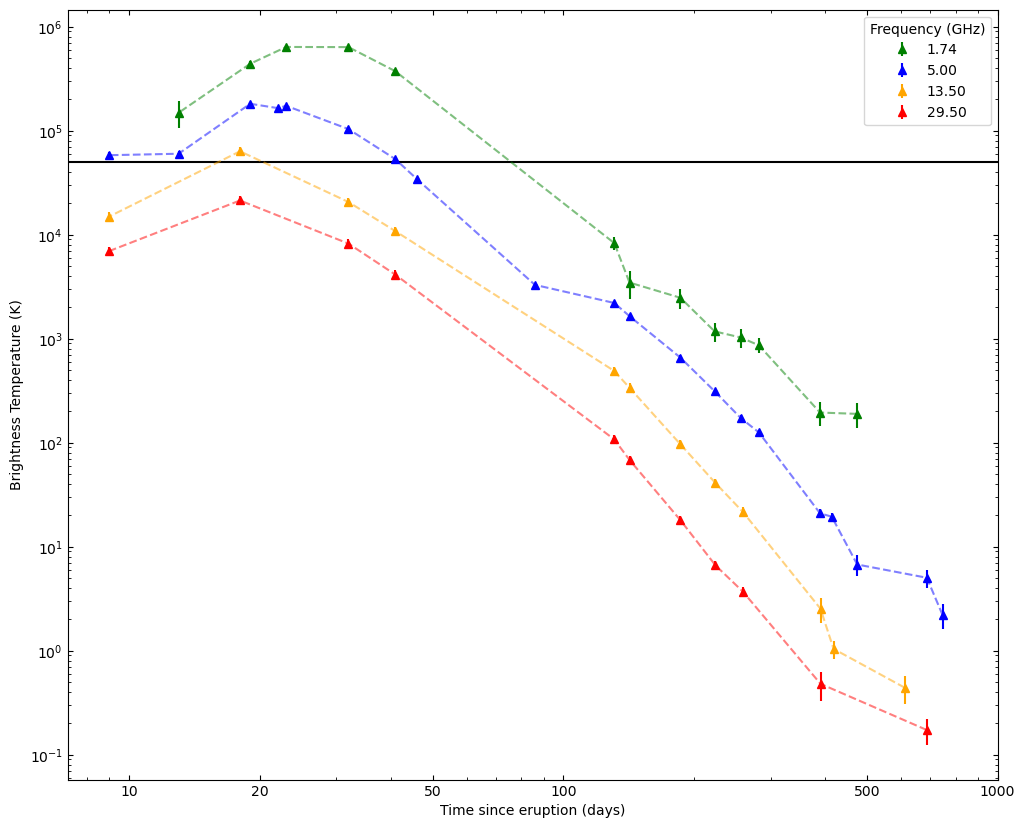

In [64]:
fig, ax = plt.subplots()
fig.set_size_inches(12,10)

ax.axhline(y=5*10**4, color='black', linestyle='-', linewidth=1.5)

used_labels = set()


def plot(days, fluxes, CTBs, CTBerrors, errors, color, label_name):
    for day, flux, CTB, CTBerr, err in zip(days, fluxes, CTBs, CTBerrors, errors):
        if flux < 3 * err:
            fmt = 'x'  # square for non-detection
            label = None  # no label for non-detections
            #ax.errorbar(day, CTB, fmt=fmt, color=color, label=label)
            
        else:
            fmt = '^'  # triangle for detection
            label = label_name if label_name not in used_labels else None
        
            ax.errorbar(day, CTB, yerr=CTBerr, fmt=fmt, color=color, label=label)
        
        if label:
            used_labels.add(label)


plot(days1_74, flux1_74, CTB_nu0, CTBError_nu0, flux_err1_74, 'green', '1.74')
ax.plot(days1_74[1:14], CTB_nu0[1:14], color='green', linestyle = '--', alpha=.50)

plot(days5, flux5, CTB_nu1, CTBError_nu1, flux_err5, 'blue', '5.00')
ax.plot(days5[0:20], CTB_nu1[0:20], color='blue', linestyle = '--', alpha=.50)

plot(days13_5, flux13_5, CTB_nu2, CTBError_nu2, flux_err13_5, 'orange', '13.50')
ax.plot(days13_5[2:21], CTB_nu2[2:21], color='orange', linestyle = '--', alpha=.50)

plot(days29_5, flux29_5, CTB_nu3, CTBError_nu3, flux_err29_5, 'red', '29.50')
ax.plot(days29_5[1:21], CTB_nu3[1:21], color='red', linestyle = '--', alpha=.50)


"""
ax.errorbar(days1_74, CTB_nu0, yerr=CTBError_nu0, fmt='^', color='green', label='1.74')
ax.plot(days1_74, CTB_nu0, color='green', linestyle = '--', alpha=.50)

ax.errorbar(days5, CTB_nu1, yerr=CTBError_nu1, fmt='^', color='blue', label='5.0')
ax.plot(days5, CTB_nu1, color='blue', linestyle = '--', alpha=.50)

ax.errorbar(days13_5, CTB_nu2, yerr=CTBError_nu2, fmt='^', color='orange', label='13.5')
ax.plot(days13_5, CTB_nu2, color='orange', linestyle = '--', alpha=.50)

ax.errorbar(days29_5, CTB_nu3, yerr=CTBError_nu3, fmt='^', color='hotpink', label='29.5')
ax.plot(days29_5, CTB_nu3, color='hotpink', linestyle = '--', alpha=.50)
"""

ax.set_xscale('log')
ax.set_xticks([10,20,50,100,500,1000], labels = ['10','20','50','100','500', '1000'])
ax.set_yscale('log')
#ax.set_yticks([.1,1,10], labels = ['0.1','1.0','10.0'])
ax.set_xlabel("Time since eruption (days)")
ax.set_ylabel("Brightness Temperature (K)")


ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax.set_title("")
plt.legend(title='Frequency (GHz)')
plt.show();